In [1]:
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pooch



# Preprocessing and clustering

In [2]:
sc.set_figure_params(dpi=50, facecolor="white")


In [3]:
EG_DATA = pooch.create(
    path=pooch.os_cache("scverse_tutorials"),
    base_url="doi:10.6084/m9.figshare.22716739.v1/",
)
EG_DATA.load_registry_from_doi()

In [4]:
samples = {
    "s1d1": "s1d1_filtered_feature_bc_matrix.h5",
    "s1d3": "s1d3_filtered_feature_bc_matrix.h5",
}
adatas = {}

for sample_id, filename in samples.items():
    path = EG_DATA.fetch(filename)
    sample_adata = sc.read_10x_h5(path)
    sample_adata.var_names_make_unique()
    adatas[sample_id] = sample_adata

adata = ad.concat(adatas, label="sample")
adata.obs_names_make_unique()
print(adata.obs["sample"].value_counts())
adata

/Users/jessica/mambaforge/envs/scanpy_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/jessica/mambaforge/envs/scanpy_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


sample
s1d1    8785
s1d3    8340
Name: count, dtype: int64


/Users/jessica/mambaforge/envs/scanpy_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/jessica/mambaforge/envs/scanpy_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/jessica/mambaforge/envs/scanpy_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 17125 × 36601
    obs: 'sample'

# Quality control

In [5]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

adata.var.head()

,mt,ribo,hb
MIR1302-2HG,False,False,False
FAM138A,False,False,False
OR4F5,False,False,False
AL627309.1,False,False,False
AL627309.3,False,False,False


In [6]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)
adata.obs.head()

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb
AAACCCAAGGATGGCT-1,s1d1,2103,7.651596,8663.0,9.066932,42.721921,59.667552,69.744892,79.348955,460.0,6.133398,5.309938,3650.0,8.202756,42.133209,17.0,2.890372,0.196237
AAACCCAAGGCCTAGA-1,s1d1,3916,8.273081,12853.0,9.461411,35.843772,44.262040,52.376877,62.763557,1790.0,7.490530,13.926710,1719.0,7.450079,13.374310,58.0,4.077538,0.451257
AAACCCAAGTGAGTGC-1,s1d1,683,6.527958,1631.0,7.397562,56.284488,62.599632,70.386266,88.779890,581.0,6.366470,35.622318,63.0,4.158883,3.862661,13.0,2.639057,0.797057
AAACCCACAAGAGGCT-1,s1d1,4330,8.373554,17345.0,9.761117,27.662150,38.420294,48.901701,62.023638,780.0,6.660575,4.496973,3936.0,8.278174,22.692417,44.0,3.806663,0.253675
AAACCCACATCGTGGC-1,s1d1,325,5.786897,555.0,6.320768,49.909910,59.459459,77.477477,100.000000,159.0,5.075174,28.648647,26.0,3.295837,4.684685,26.0,3.295837,4.684685


### Visualize the QC metrics using violin plots

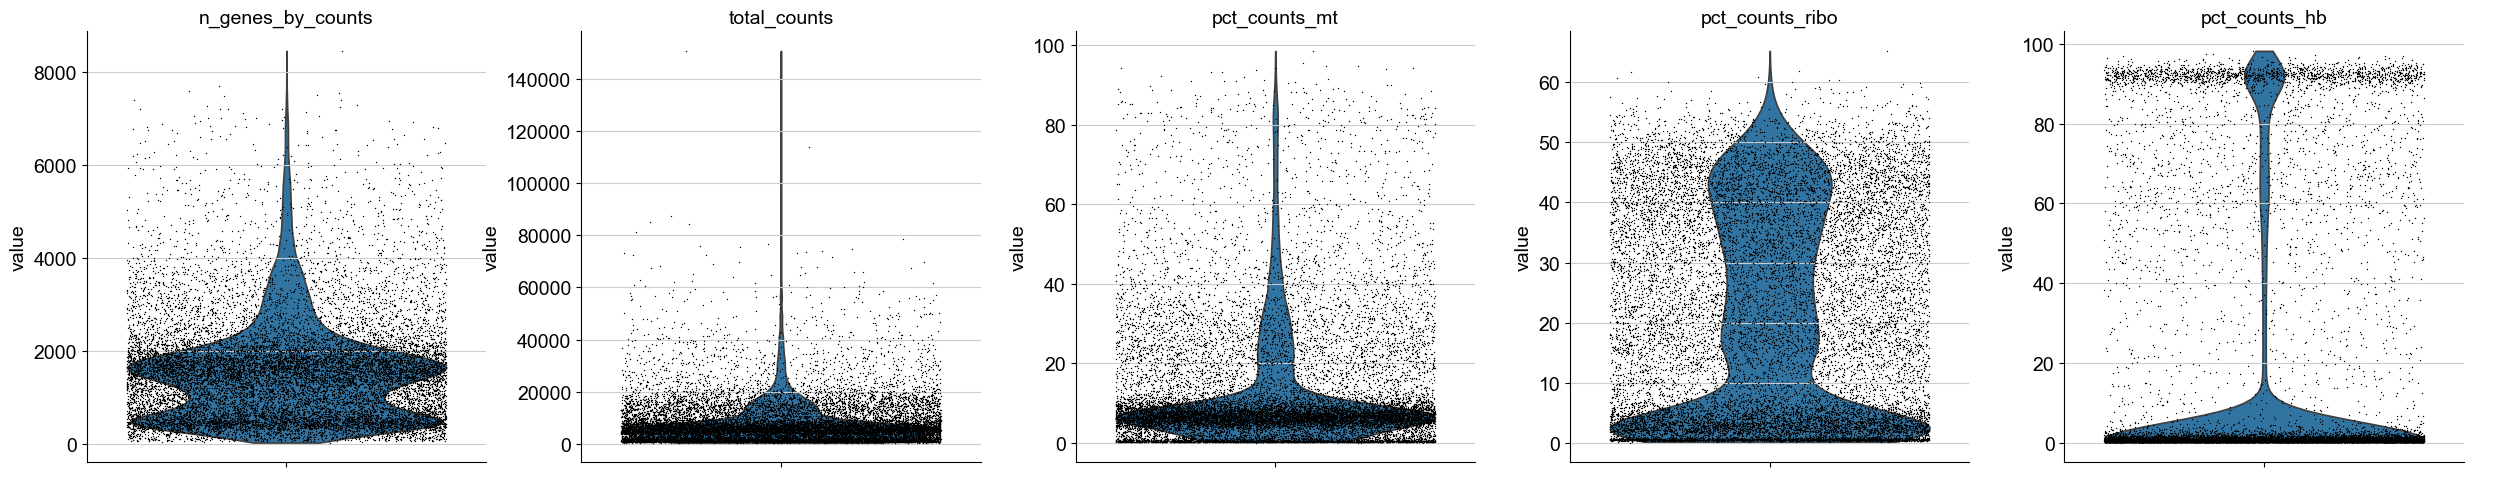

In [9]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo", "pct_counts_hb"],
    jitter=0.4,
    multi_panel=True,
)

### Scatter plot to visualize the relationship between total counts and number of genes expressed

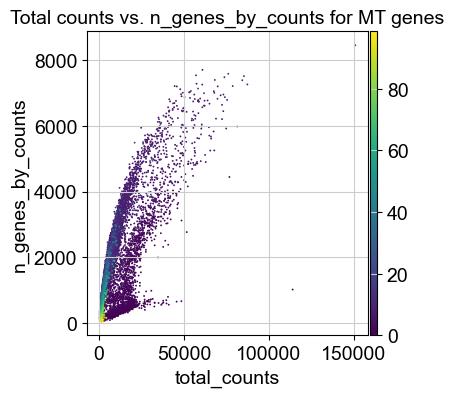

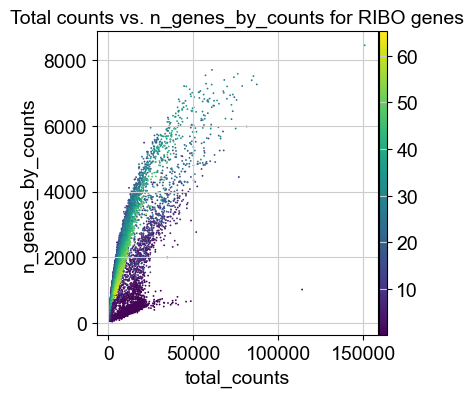

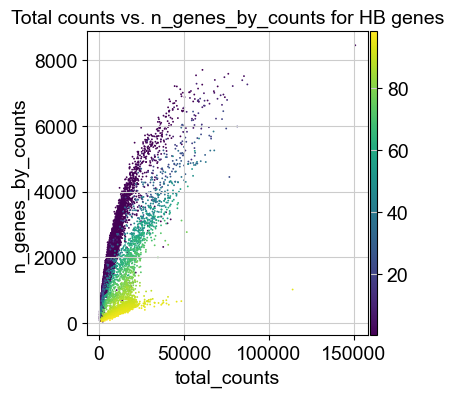

In [11]:
for gene_type in ["mt", "ribo", "hb"]:
    sc.pl.scatter(
        adata,
        x="total_counts",
        y="n_genes_by_counts",
        color=f"pct_counts_{gene_type}",
        title=f"Total counts vs. n_genes_by_counts for {gene_type.upper()} genes"
    )


## Filter cells based on QC metrics

In [16]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

## Doublet detection

In [ ]:
sc.pp.scrublet(adata, batch_key="sample")


In [20]:
adata.obs.head()

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,...,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes,doublet_score,predicted_doublet
AAACCCAAGGATGGCT-1,s1d1,2103,7.651596,8663.0,9.066932,42.721921,59.667552,69.744892,79.348955,460.0,...,5.309938,3650.0,8.202756,42.133209,17.0,2.890372,0.196237,2103,0.036113,False
AAACCCAAGGCCTAGA-1,s1d1,3916,8.273081,12853.0,9.461411,35.843772,44.262040,52.376877,62.763557,1790.0,...,13.926710,1719.0,7.450079,13.374310,58.0,4.077538,0.451257,3912,0.183381,False
AAACCCAAGTGAGTGC-1,s1d1,683,6.527958,1631.0,7.397562,56.284488,62.599632,70.386266,88.779890,581.0,...,35.622318,63.0,4.158883,3.862661,13.0,2.639057,0.797057,683,0.045320,False
AAACCCACAAGAGGCT-1,s1d1,4330,8.373554,17345.0,9.761117,27.662150,38.420294,48.901701,62.023638,780.0,...,4.496973,3936.0,8.278174,22.692417,44.0,3.806663,0.253675,4328,0.045320,False
AAACCCACATCGTGGC-1,s1d1,325,5.786897,555.0,6.320768,49.909910,59.459459,77.477477,100.000000,159.0,...,28.648647,26.0,3.295837,4.684685,26.0,3.295837,4.684685,323,0.016181,False
